In [1]:
import jax.numpy as jnp
import jax.random as jr
from jax import vmap
from bnn import BNN

import pickle

from coinem.uci import Boston

import matplotlib.pyplot as plt

In [2]:
name = "Boston"

with open(f"results/{name}.pkl","rb") as f:
        data = pickle.load(f)

data["rmse"].keys()

adam = jnp.array(data["rmse"]["adam"])#.reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations

/var/folders/v8/gbnmymvs4pdgpz0nq6c9v28w0000gn/T/ipykernel_67621/551977974.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100 * coin.mean())
/var/folders/v8/gbnmymvs4pdgpz0nq6c9v28w0000gn/T/ipykernel_67621/551977974.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100 * coin.mean())
/var/folders/v8/gbnmymvs4pdgpz0nq6c9v28w0000gn/T/ipykernel_67621/551977974.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100 * coin.mean())
/var/folders/v8/gbnmymvs4pdgpz0nq6c9v28w0000gn/T/ipykernel_67621/551977974.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100 * coin.mean())
/var/folders/v8/gbnmymvs4pdgpz0nq6c9v28w0000gn/T/ipykernel_67621/551977974.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100 * coin.mean())
/var/

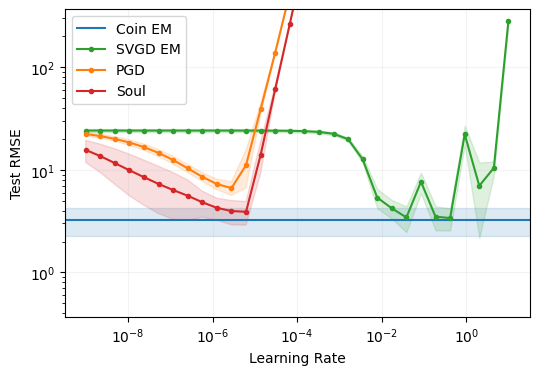

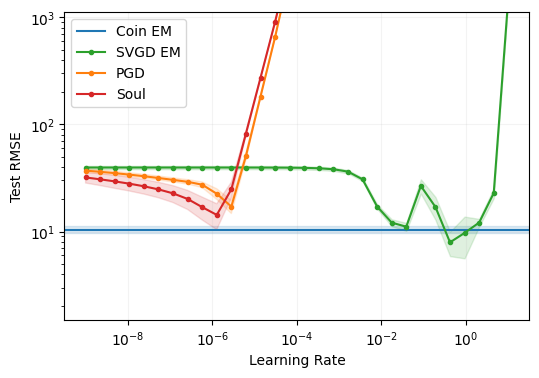

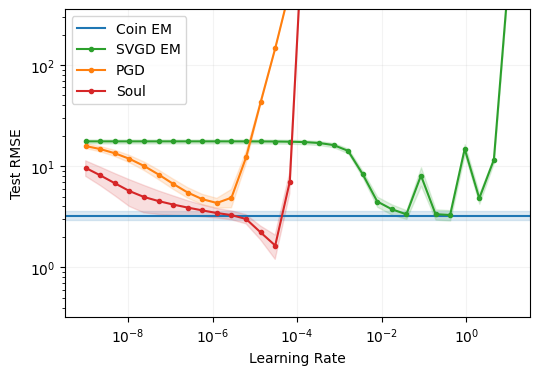

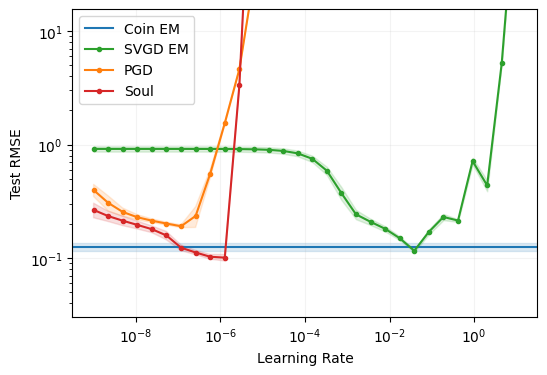

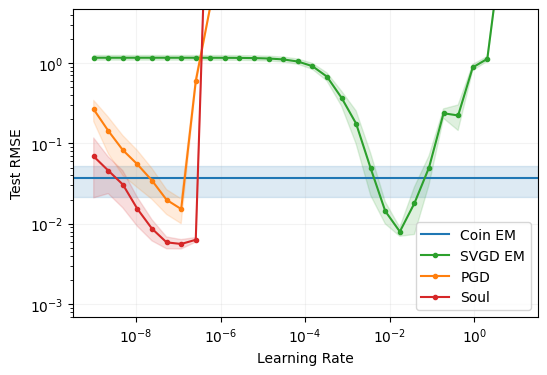

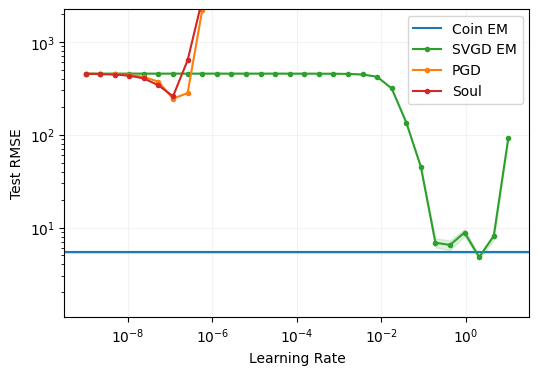

In [9]:

for name in ["Boston", "Concrete", "Energy", "Kin8nm", "Naval", "Power"]:#, "Protein", "Wine", "Yacht"]

    with open(f"results/{name}.pkl","rb") as f:
        data = pickle.load(f)


    adam = jnp.array(data["rmse"]["adam"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    ada = jnp.array(data["rmse"]["ada"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    pgd = jnp.array(data["rmse"]["pgd"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    soul = jnp.array(data["rmse"]["soul"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    # ada_pgd = jnp.array(data["rmse"]["ada_pgd"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations
    # ada_soul = jnp.array(data["rmse"]["ada_soul"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations

    coin = jnp.array(data["rmse"]["coin"]) # Repetitions, by iterations

    step_sizes = data["step_sizes"]


    # Index of the iteration to plot
    i = -1

    thresh = 5 * jnp.mean(coin[:, i].std(axis=0))

    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot coin
    ax.axhline(coin[:, i].mean(axis=0), label="Coin EM", color="C0")
    ax.axhspan(coin[:, i].mean(axis=0) - coin[:, i].std(axis=0), coin[:, i].mean(axis=0) + coin[:, i].std(axis=0), alpha=0.15, color="C0")

    # # Plot adam
    # ax.plot(step_sizes, adam[:,:,i].mean(axis=0), label='Adam SVGD', color="C1")
    # ax.fill_between(step_sizes, adam[:,:,i].mean(axis=0) - jnp.minimum(adam[:,:,i].std(axis=0), thresh), adam[:,:,i].mean(axis=0) + jnp.minimum(adam[:,:,i].std(axis=0), thresh), alpha=0.15, color="C1")

    # Plot ada
    ax.plot(step_sizes, ada[:,:,i].mean(axis=0), ".-", label='SVGD EM', color="C2")
    ax.fill_between(step_sizes, ada[:,:,i].mean(axis=0) - jnp.minimum(ada[:,:,i].std(axis=0), thresh), ada[:,:,i].mean(axis=0) + jnp.minimum(ada[:,:,i].std(axis=0), thresh), alpha=0.15, color="C2")

    # Plot pgd
    ax.plot(step_sizes, pgd[:,:,i].mean(axis=0), ".-",label='PGD', color="C1")
    ax.fill_between(step_sizes, pgd[:,:,i].mean(axis=0) - jnp.minimum(pgd[:,:,i].std(axis=0), thresh), pgd[:,:,i].mean(axis=0) + jnp.minimum(pgd[:,:,i].std(axis=0), thresh), alpha=0.15, color="C1")

    # Plot soul
    ax.plot(step_sizes, soul[:,:,i].mean(axis=0), ".-", label='Soul', color="C3")
    ax.fill_between(step_sizes, soul[:,:,i].mean(axis=0) - jnp.minimum(soul[:,:,i].std(axis=0), thresh), soul[:,:,i].mean(axis=0) + jnp.minimum(soul[:,:,i].std(axis=0), thresh), alpha=0.15, color="C3")

    # # Plot ada_pgd
    # ax.plot(step_sizes, ada_pgd[:,:,i].mean(axis=0), ".-", label='Ada PGD', color="C4")
    # ax.fill_between(step_sizes, ada_pgd[:,:,i].mean(axis=0) - jnp.minimum(ada_pgd[:,:,i].std(axis=0), thresh), ada_pgd[:,:,i].mean(axis=0) + jnp.minimum(ada_pgd[:,:,i].std(axis=0), thresh), alpha=0.15, color="C4")

    # # Plot ada_soul
    # ax.plot(step_sizes, ada_soul[:,:,i].mean(axis=0), ".-", label='Ada Soul', color="C5")
    # ax.fill_between(step_sizes, ada_soul[:,:,i].mean(axis=0) - jnp.minimum(ada_soul[:,:,i].std(axis=0), thresh), ada_soul[:,:,i].mean(axis=0) + jnp.minimum(ada_soul[:,:,i].std(axis=0), thresh), alpha=0.15, color="C5")

    



    plt.xscale('log')
    plt.yscale("log") 
    plt.xlabel('Learning Rate')
    plt.ylabel('Test RMSE')
    plt.legend()
    plt.ylim(0, 100 * coin.mean())
    plt.grid(True, alpha=0.15)

    plt.savefig(f"results/{name}_rmse.pdf", bbox_inches='tight')

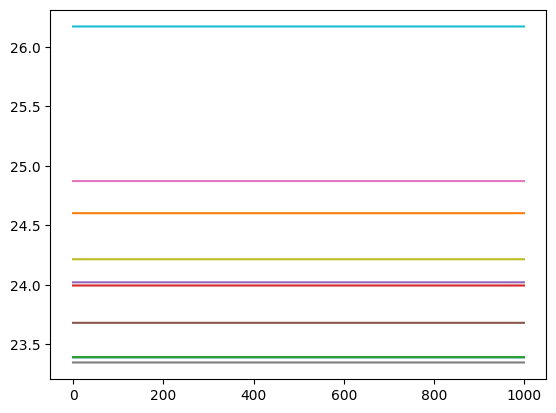

In [58]:
ada = jnp.array(data["rmse"]["ada"]).reshape((-1, 30, 1000)) # Learnrates, by repetitions, by iterations

plt.plot(ada[:, 3,:].T)

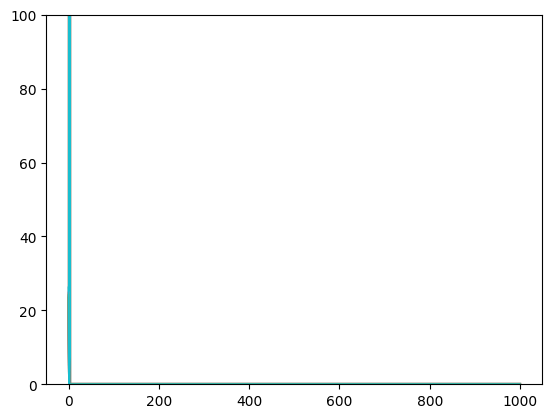

In [54]:
#for name in ["Boston", "Concrete", "Energy", "Kin8nm", "Naval", "Power"]:#, "Protein", "Wine", "Yacht"]

with open(f"results/Boston.pkl","rb") as f:
    data = pickle.load(f)


adam = jnp.nan_to_num(jnp.array(data["rmse"]["adam"]).reshape((-1, 30, 1000)), 100000) # Learnrates, by repetitions, by iterations
ada = jnp.nan_to_num(jnp.array(data["rmse"]["ada"]).reshape((-1, 30, 1000)), 100000)  # Learnrates, by repetitions, by iterations
pgd = jnp.nan_to_num(jnp.array(data["rmse"]["pgd"]).reshape((-1, 30, 1000)), 100000) # Learnrates, by repetitions, by iterations
soul = jnp.nan_to_num(jnp.array(data["rmse"]["soul"]).reshape((-1, 30, 1000)), 100000) # Learnrates, by repetitions, by iterations


adam_ind = adam.mean(axis=0)[:, -1].argmin()
ada_ind = ada.mean(axis=0)[:, -1].argmin()
pgd_ind = pgd.mean(axis=0)[:, -1].argmin()
soul_ind = soul.mean(axis=0)[:, -1].argmin()



#plt.plot(adam[:, ada_ind, :].T)
#plt.plot(ada[:, ada_ind, :].T)
plt.ylim(0, 100)
plt.plot(pgd[:, pgd_ind, :].T)
plt.plot(soul[:, soul_ind, :].T)